### Aula 1 - Analise de Dados Python

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [4]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df.shape

(133349, 11)

In [8]:
linhas, colunas = df.shape[0], df.shape[1]
print(f"A base de dados possui {linhas} linhas e {colunas} colunas")

A base de dados possui 133349 linhas e 11 colunas


In [9]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [10]:
renomear_colunas = {
    'work_year':'ano',
    'experience_level':'senioridade',
    'employment_type':'contrato',
    'job_title':'cargo',
    'salary':'salario',
    'salary_currency':'moeda',
    'salary_in_usd':'dolar',
    'employee_residence':'residencia',
    'remote_ratio':'remoto',
    'company_location':'localizacao',
    'company_size':'empresa'
}
df.rename(columns=renomear_colunas, inplace=True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'dolar',
       'residencia', 'remoto', 'localizacao', 'empresa'],
      dtype='object')

In [11]:
df["senioridade"].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [12]:
df["contrato"].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [13]:
df["remoto"].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

In [14]:
df["empresa"].value_counts()

empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [15]:
senioridade = {
    'SE': 'Senior' ,
    'MI': 'Pleno' ,
    'EN': 'Junior' ,
    'EX': 'Executive'
}

df["senioridade"] = df["senioridade"].replace(senioridade)
df["senioridade"].value_counts()

senioridade
Senior       77241
Pleno        40465
Junior       12443
Executive     3200
Name: count, dtype: int64

In [16]:
contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer'
}

df["contrato"] = df["contrato"].map(contrato)
df["contrato"].value_counts()

contrato
Tempo Integral    132563
Contrato             394
Tempo Parcial        376
Freelancer            16
Name: count, dtype: int64

In [17]:
empresa = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
}

df["empresa"] = df["empresa"].map(empresa)
df["empresa"].value_counts()

empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [18]:
traducao_remoto = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Híbrido'
}

df["remoto"] = df["remoto"].map(traducao_remoto)
df["remoto"].value_counts()

remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64

In [19]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,dolar,residencia,remoto,localizacao,empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [20]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,localizacao,empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [21]:
df.describe()

,ano,salario,dolar
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


### Aula 2 - Preparação e limpeza dos Dados

In [22]:
# Analisar valores nulos/ausentes
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,dolar,residencia,remoto,localizacao,empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [23]:
# Analisar a base de dados
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,dolar,residencia,remoto,localizacao,empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [24]:
# Somar todos os campos que possuem valores nulos
df.isnull().sum()

ano            10
senioridade     0
contrato        0
cargo           0
salario         0
moeda           0
dolar           0
residencia      0
remoto          0
localizacao     0
empresa         0
dtype: int64

In [25]:
# Trazer os valores únicos da coluna 'ano'
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [26]:
# Filtrar registros com valores nulos na coluna 'ano'
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,dolar,residencia,remoto,localizacao,empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [27]:
#Importar numpy para manipulação de dados numericos
import numpy as np

In [28]:
#Analisando salarios
# Criar um DataFrame
df_salarios = pd.DataFrame({
'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'val'],
'salario': [4000, np.nan, 5000, np.nan, 100000],
})

# Calcular a média salarial e substituir valores nulos pela média e arrendondar os valores
df_salarios['salario_medio'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
# calcular a mediana salarial e substituir valores nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_medio,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,val,100000.0,100000.00,100000.0


In [29]:
#Analisando salarios
# Criar um DataFrame
df_salarios = pd.DataFrame({
'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'val'],
'salario': [4000, np.nan, 5000, np.nan, 100000],
})

# Calcular a média salarial e substituir valores nulos pela média e arrendondar os valores
df_salarios['salario_medio'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
# calcular a mediana salarial e substituir valores nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_medio,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,val,100000.0,100000.00,100000.0


In [30]:
# Analisando temperaturas
df_temperaturas = pd.DataFrame({
    'dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
    })

# Usando Bfill (PREENCHE COM VALORES POSTERIORES)
df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [31]:
#Analisando cidades
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'val'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém'],
})

# Preencher valores nulos na coluna 'cidade' com 'Não Informado'
df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não Informado')
display(df_cidades)

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não Informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não Informado
4,val,Belém,Belém


In [32]:
df_limpo = df.dropna()

In [33]:
df_limpo.isnull().sum()

ano            0
senioridade    0
contrato       0
cargo          0
salario        0
moeda          0
dolar          0
residencia     0
remoto         0
localizacao    0
empresa        0
dtype: int64

In [34]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,dolar,residencia,remoto,localizacao,empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [35]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ano          133339 non-null  float64
 1   senioridade  133339 non-null  object 
 2   contrato     133339 non-null  object 
 3   cargo        133339 non-null  object 
 4   salario      133339 non-null  int64  
 5   moeda        133339 non-null  object 
 6   dolar        133339 non-null  int64  
 7   residencia   133339 non-null  object 
 8   remoto       133339 non-null  object 
 9   localizacao  133339 non-null  object 
 10  empresa      133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [36]:
# Converter a coluna 'ano' para o tipo int64
# Isso é necessário para garantir que a coluna 'ano' seja tratada como um número inteiro
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [37]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,dolar,residencia,remoto,localizacao,empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [38]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ano          133339 non-null  int64 
 1   senioridade  133339 non-null  object
 2   contrato     133339 non-null  object
 3   cargo        133339 non-null  object
 4   salario      133339 non-null  int64 
 5   moeda        133339 non-null  object
 6   dolar        133339 non-null  int64 
 7   residencia   133339 non-null  object
 8   remoto       133339 non-null  object
 9   localizacao  133339 non-null  object
 10  empresa      133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


### Aula 3 - Visualização de Dados

In [39]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,dolar,residencia,remoto,localizacao,empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'distribuição de senioridade'}, xlabel='senioridade'>

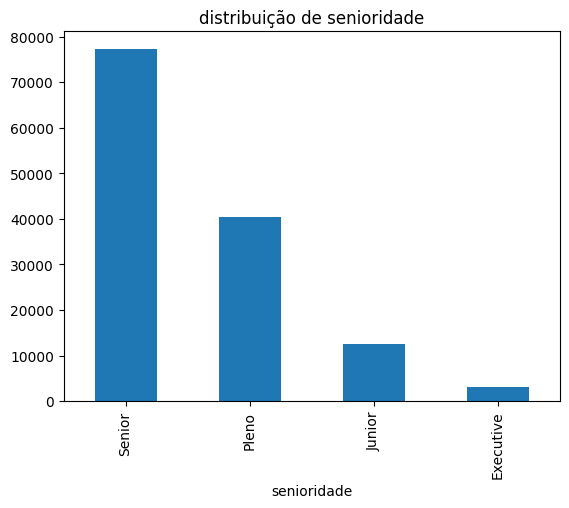

In [40]:
df_limpo['senioridade'].value_counts().plot(kind = 'bar', title = 'distribuição de senioridade')

In [41]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='dolar'>

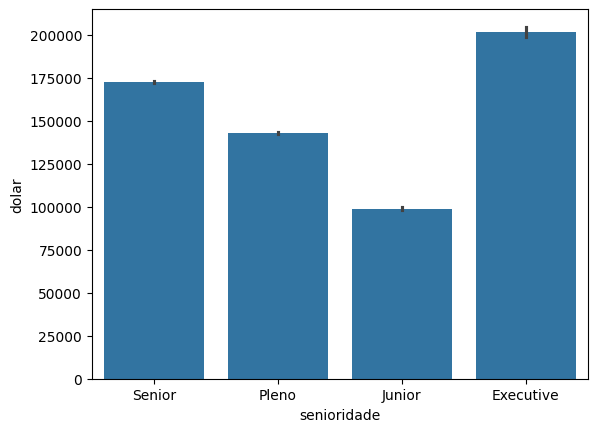

In [42]:
sns.barplot(data=df_limpo, x='senioridade', y='dolar')

In [43]:
import matplotlib.pyplot as plt

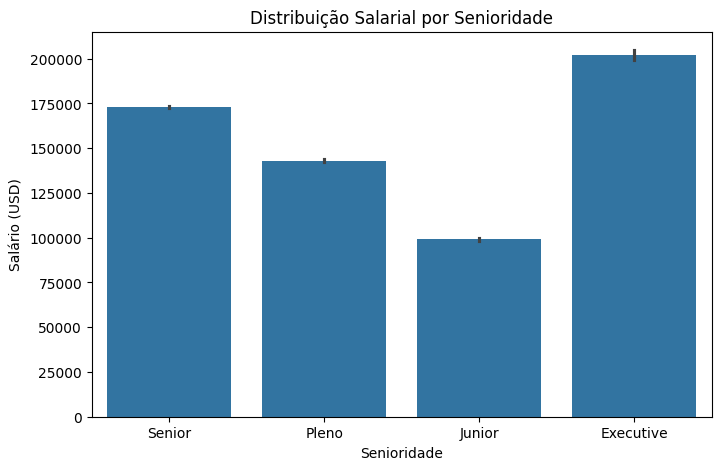

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='dolar')
plt.title('Distribuição Salarial por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário (USD)')
plt.show()

In [45]:
df_limpo.groupby('senioridade')['dolar'].mean().sort_values(ascending=False)

senioridade
Executive    202027.667813
Senior       172850.838301
Pleno        143044.845979
Junior        99034.963267
Name: dolar, dtype: float64

In [46]:
ordem = df_limpo.groupby('senioridade')['salario'].mean().sort_values(ascending=False).index

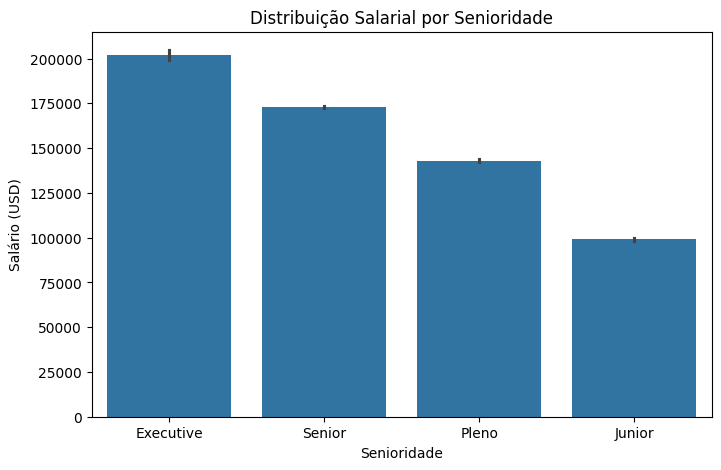

In [47]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='dolar', order=ordem)
plt.title('Distribuição Salarial por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário (USD)')
plt.show()

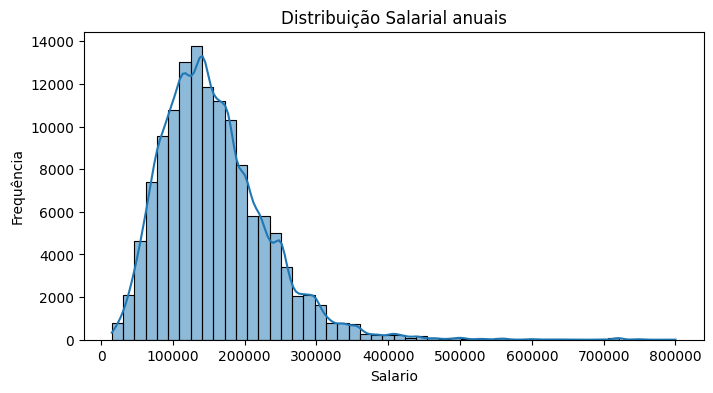

In [48]:
plt.figure(figsize=(8, 4))
sns.histplot(df_limpo['dolar'], bins=50, kde=True)
plt.title('Distribuição Salarial anuais')
plt.xlabel('Salario')
plt.ylabel('Frequência')
plt.show()

Text(0.5, 0, 'Salario')

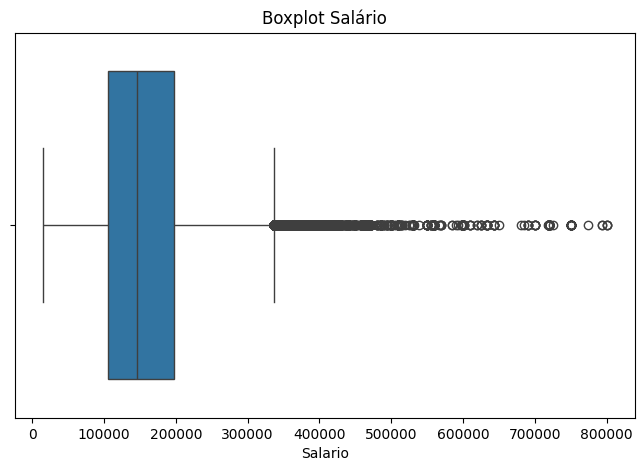

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_limpo['dolar'])
plt.title('Boxplot Salário')
plt.xlabel('Salario')

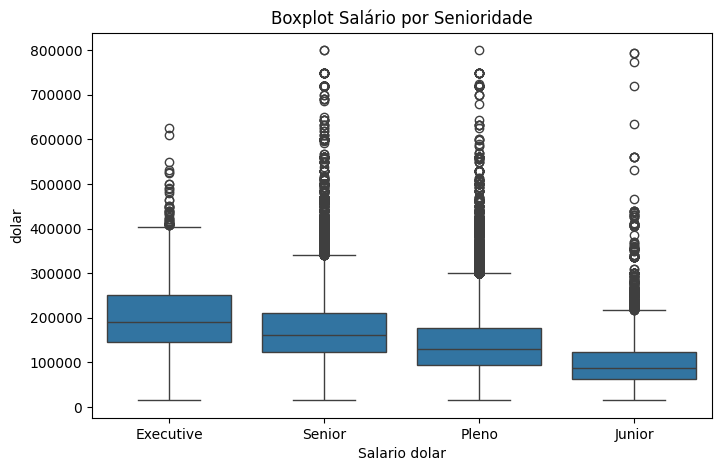

In [50]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executive']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='dolar', data=df_limpo, order=ordem)
plt.title('Boxplot Salário por Senioridade')
plt.xlabel('Salario dolar')
plt.show()

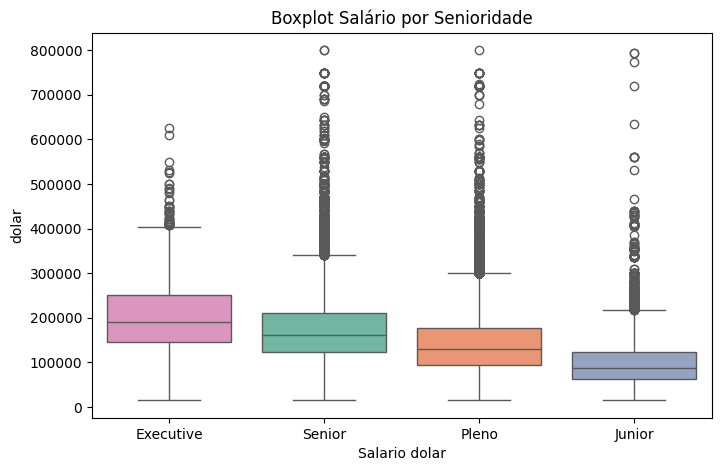

In [51]:
#Adicionar Cores aos Graficos
ordem_senioridade = ['junior', 'pleno', 'senior', 'executive']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='dolar', data=df_limpo, order=ordem, palette='Set2', hue='senioridade')
plt.title('Boxplot Salário por Senioridade')
plt.xlabel('Salario dolar')
plt.show()

In [52]:
import plotly.express as px

In [53]:
df_agrupado = df_limpo.groupby('senioridade')['dolar'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(df_agrupado, x='senioridade', y='dolar',
             title='Média Salarial por Senioridade',
             labels={'dolar': 'Média Salarial (USD)', 'senioridade': 'Senioridade'})
fig.show()

In [54]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['remoto', 'quantidade']

fig = px.pie(remoto_contagem,
             names='remoto',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5)
fig.update_traces(textinfo='percent+label')
fig.show()

### Desafio Aula 3

O objetivo é descobrir como a média salarial para o cargo de Cientista de Dados (conhecido como "Data Scientist") se comporta em diferentes países e mostre o salário médio por país  na base original.




In [55]:
df_cientista_dados = df_limpo[df_limpo['cargo'] == 'Data Scientist']

salario_medio_por_pais = df_cientista_dados.groupby('residencia')['dolar'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    salario_medio_por_pais,
    x='residencia',
    y='dolar',
    title='Salário Médio Anual de Cientistas de Dados por País',
    labels={'residencia': 'País de Residência', 'dolar': 'Salário Médio Anual (Dólar)'}
)

fig.show()

In [56]:
df_cientista_dados = df_limpo[df_limpo['cargo'] == 'Data Scientist']
salario_medio_por_pais = df_cientista_dados.groupby('residencia')['dolar'].mean().reset_index()

country_names = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'CA': 'Canada',
    'AU': 'Australia',
    'DE': 'Germany',
    'FR': 'France',
    'ES': 'Spain',
    'NL': 'Netherlands',
    'JP': 'Japan',
    'IN': 'India',
    'BR': 'Brazil',
    'IT': 'Italy',
    'IE': 'Ireland',
    'CH': 'Switzerland',
    'RU': 'Russia',
    'PL': 'Poland',
    'MX': 'Mexico',
    'AE': 'United Arab Emirates',
    'TR': 'Turkey',
    'NG': 'Nigeria',
    'AT': 'Austria',
    'NO': 'Norway',
    'HU': 'Hungary',
    'SE': 'Sweden',
    'GR': 'Greece',
    'BE': 'Belgium',
    'PT': 'Portugal',
    'FI': 'Finland',
    'AR': 'Argentina',
    'DK': 'Denmark',
    'NZ': 'New Zealand',
    'SG': 'Singapore',
    'UA': 'Ukraine',
    'HN': 'Honduras',
    'PH': 'Philippines',
    'RO': 'Romania',
    'IR': 'Iran',
    'VN': 'Vietnam',
    'PK': 'Pakistan',
    'SI': 'Slovenia',
    'HR': 'Croatia',
    'EE': 'Estonia',
    'DZ': 'Algeria',
    'CR': 'Costa Rica',
    'CY': 'Cyprus',
    'LU': 'Luxembourg',
    'CZ': 'Czech Republic',
    'BG': 'Bulgaria',
    'CL': 'Chile',
    'HK': 'Hong Kong',
    'KE': 'Kenya',
    'MA': 'Morocco',
    'LT': 'Lithuania',
    'IS': 'Iceland',
    'TH': 'Thailand',
    'ID': 'Indonesia',
    'IL': 'Israel',
    'KW': 'Kuwait',
    'MT': 'Malta',
    'RS': 'Serbia',
    'SA': 'Saudi Arabia',
    'BA': 'Bosnia and Herzegovina',
    'MD': 'Moldova',
    'AM': 'Armenia',
    'AZ': 'Azerbaijan',
    'BS': 'Bahamas',
    'BO': 'Bolivia',
    'CN': 'China',
    'CO': 'Colombia',
    'CU': 'Cuba',
    'DO': 'Dominican Republic',
    'EC': 'Ecuador',
    'EG': 'Egypt',
    'ET': 'Ethiopia',
    'FJ': 'Fiji',
    'GA': 'Gabon',
    'GE': 'Georgia',
    'GH': 'Ghana',
    'GT': 'Guatemala',
    'IQ': 'Iraq',
    'JM': 'Jamaica',
    'JO': 'Jordan',
    'KZ': 'Kazakhstan',
    'LB': 'Lebanon',
    'LY': 'Libya',
    'MK': 'North Macedonia',
    'MN': 'Mongolia',
    'MO': 'Macau',
    'MU': 'Mauritius',
    'MW': 'Malawi',
    'MY': 'Malaysia',
    'NA': 'Namibia',
    'NP': 'Nepal',
    'OM': 'Oman',
    'PA': 'Panama',
    'PE': 'Peru',
    'PG': 'Papua New Guinea',
    'PR': 'Puerto Rico',
    'PY': 'Paraguay',
    'QA': 'Qatar',
    'RW': 'Rwanda',
    'SN': 'Senegal',
    'TJ': 'Tajikistan',
    'TN': 'Tunisia',
    'TZ': 'Tanzania',
    'UG': 'Uganda',
    'UY': 'Uruguay',
    'UZ': 'Uzbekistan',
    'VE': 'Venezuela',
    'YE': 'Yemen',
    'ZA': 'South Africa',
    'ZM': 'Zambia',
    'ZW': 'Zimbabwe'
}

salario_medio_por_pais['pais'] = salario_medio_por_pais['residencia'].map(country_names)

fig = px.choropleth(
    salario_medio_por_pais,
    locations='pais',
    locationmode='country names',
    color='dolar',
    hover_name='pais',
    hover_data=['dolar'], 
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Salário Médio Anual de Cientistas de Dados por País (USD)',
    width=1000,
    height=600,
    scope='world'
)

fig.update_layout(dragmode=False)
fig.show()


### Aula 4 - Criando o Dashboard

In [ ]:
# Exportar o DataFrame limpo para um arquivo CSV
df_limpo.to_csv('dados.csv', index=False)